**Introduction**


Domain-specific area and objectives:

The leading cause of mortality worldwide is cardiovascular diseases (CVDs), which claim 17.9 million lives annually, or 31% of all deaths worldwide.
Twelve features in this dataset can be used to predict death from heart failure, which is a typical occurrence brought on by CVDs.

Behavioral risk factors like smoking, unhealthy diets, obesity, physical inactivity, and excessive alcohol consumption are some factors that impact the heart faliure mortality rate. Implementing population-wide strategies to promote healthier lifestyles and habits represents a proactive approach to preventing these heart faliure mortality rates.

A machine learning model can be very helpful in the early detection and treatment of individuals with cardiovascular disease and high cardiovascular risk due to the existence of one or more risk factors, such as hypertension, diabetes, hyperlipidemia, or already existing illness.

In this coursework, I will be using machine learning for predicting mortality caused by Heart Failure, by training a model based on current clinical records consisting of the patients heart faliure causes and symptoms and also evaluating the accuracy of this model at the end. I believe this will be a cost-effective way of assisting individuals in detecting survival rates, as they can simply indicate the presence of causes and symptoms that would make a patient's clinical record appear more critical compared to other heart failure patients and give early treatment to those at high risk.  With such a system in place, there is a possibility of reducing the number of mortality rates.This information can guide the development of targeted interventions to prevent cardiovascular diseases at a population level.

The objectives of this project include early detection of individuals at high risk of heart failure mortality, evaluating model accuracy,cost-effectiveness, contributing to healthcare practices, improving patient outcomes, optimizing resource allocation, informing public health strategies, advancing machine learning in healthcare, and facilitating knowledge transfer to the scientific and healthcare communities. The overall goal is to create an impactful tool for predicting heart failure mortality, reducing associated mortality rates.

**Dataset description -**

The medical records of 299 heart failure patients and 13 columns was collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old.The heart failure clinical records dataset can be accessed via the Kaggle official website.

Link to dataset:https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data
reference: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Features:

age: Age of the patient(Integer), which can be crucial in understanding how cardiovascular issues vary across different age groups.

anaemia: Whether the patient has anaemia (0: No, 1: Yes)(Integer (0 or 1)). It can be a significant factor in cardiovascular health.

creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)(Integer). Abnormal levels of CPK can be associated with heart-related conditions.

diabetes: Whether the patient has diabetes (0: No, 1: Yes)(Integer (0 or 1)). It is a common risk factor for cardiovascular diseases.

ejection_fraction: Percentage of blood leaving the heart at each contraction (Float). Low ejection fraction is often linked to heart failure.

high_blood_pressure: Whether the patient has high blood pressure, a major risk factor for cardiovascular diseases. (0: No, 1: Yes) (Integer (0 or 1))

platelets: Platelet count in the blood (kiloplatelets/mL)(Float). It is relevant to the blood clotting process.

serum_creatinine: Level of serum creatinine in the blood (mg/dL)(Float). Abnormal creatinine levels can indicate kidney problems, which are often linked to cardiovascular issues.

serum_sodium: Level of serum sodium in the blood (mEq/L)(Integer). Sodium levels are important for overall health, including cardiovascular health.

sex: Gender of the patient (0: Female, 1: Male)(Integer (0 or 1)). Cardiovascular diseases can sometimes affect males and females differently.

smoking: Whether the patient smokes (0: No, 1: Yes)(Integer (0 or 1)). Smoking is a well-known risk factor for cardiovascular diseases.

time: Follow-up period (days) (Integer). It is crucial for understanding the progression of cardiovascular conditions over time.

Target Variable:

DEATH_EVENT: Whether the patient experienced a death event during the follow-up period (0: No, 1: Yes)(Integer (0 or 1))this is the outcome needed for prediction.

With these attributes, I will be able to check which feature causes a higher mortality rate among the patients clinical records and get these patients early detections and immediate treatment. I will have to first make sure that the data is "clean", before proceeding to train a prediction model. Visualization plots will be done to help with understanding the dataset, as well as how each feature relates to the mortality rate. At the end of this project, an evaluation of the model's accuracy will be done. 

**Import libaries and load data**

In [11]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
import plotly.express as px

In [13]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [14]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Data cleaning**

In [16]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [17]:
data.duplicated().sum()

0

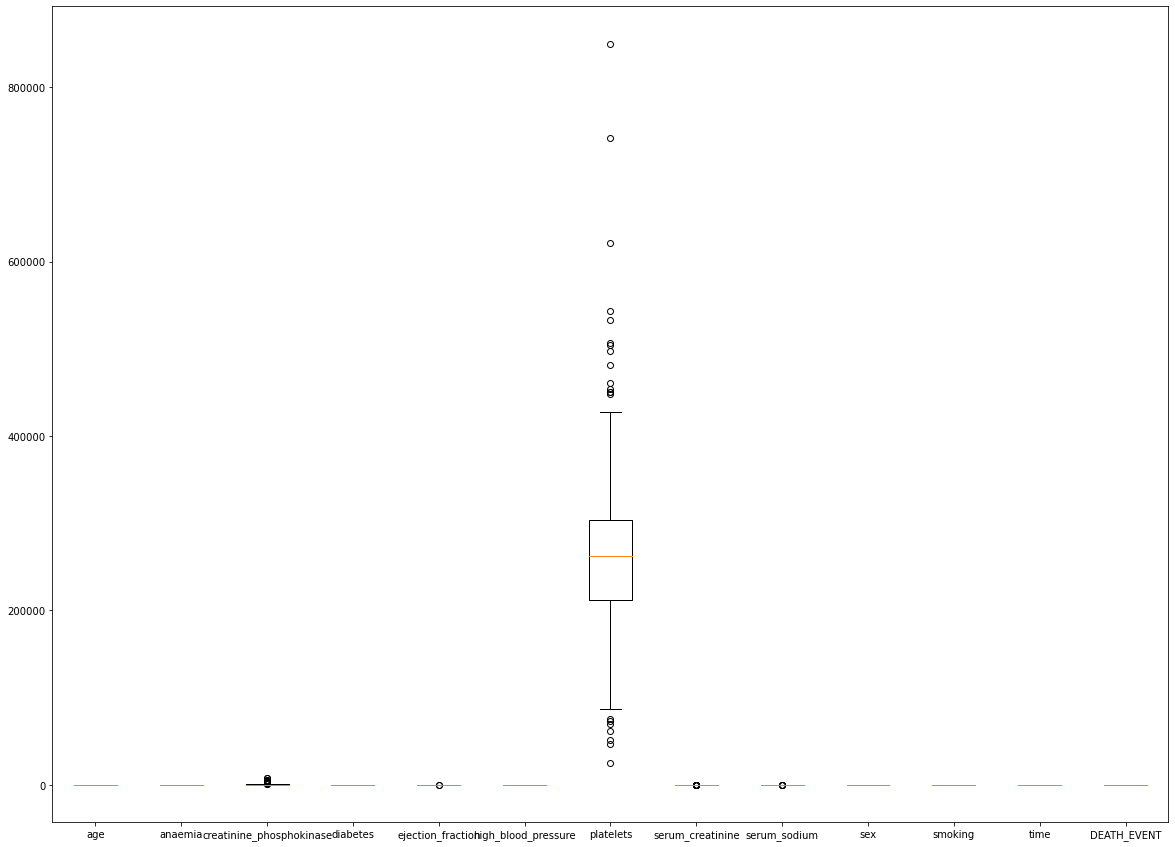

In [18]:
# Outliers values
plt.figure(figsize=(20, 15))
plt.boxplot(data, labels=data.columns)
plt.show()

**Statistical analysis**

Statistical analysis of the data will be done, calculating the measures of central tendency, measures of spread and concluding the type of distribution

In [19]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Further processing is required because I am unable to obtain any valuable information from the output above. The data values that are being utilised to represent the characteristics need to be changed first since they are a little ambiguous.

In [20]:
# copy the dataset
dataset_copy = data.copy()

# replaces each column that is represented with 1 and 2, to NO and YES
for col in dataset_copy.columns:
    dataset_copy[col] = dataset_copy[col].replace({0 : "NO" , 1 : "YES"})
    
# get the first 5 rows
dataset_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,NO,582,NO,20,YES,265000.00,1.9,130,YES,NO,4,YES
1,55.0,NO,7861,NO,38,NO,263358.03,1.1,136,YES,NO,6,YES
2,65.0,NO,146,NO,20,NO,162000.00,1.3,129,YES,YES,7,YES
3,50.0,YES,111,NO,20,NO,210000.00,1.9,137,YES,NO,7,YES
4,65.0,YES,160,YES,20,NO,327000.00,2.7,116,NO,NO,8,YES


In [21]:
# get the basic statistics of the dataset_copy
dataset_copy.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,148.000000,285.000000


In [22]:
# Calculate mode for nominal datatypes
# get all columns, except for "AGE" column
dataset_nominal = dataset_copy.loc[:, dataset_copy.columns != "AGE"]

# for each nominal datatype column, count the number of values
for col in dataset_nominal.columns:
    print(col, ":")
    print("--------------------------")
    print(dataset_nominal[col].value_counts())
    print("\n")

age :
--------------------------
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64


anaemia :
--------------------------
NO     170
YES    129
Name: anaemia, dtype: int64


creatinine_phosphokinase :
--------------------------
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64


diabet

In [23]:
data.corr()['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:>

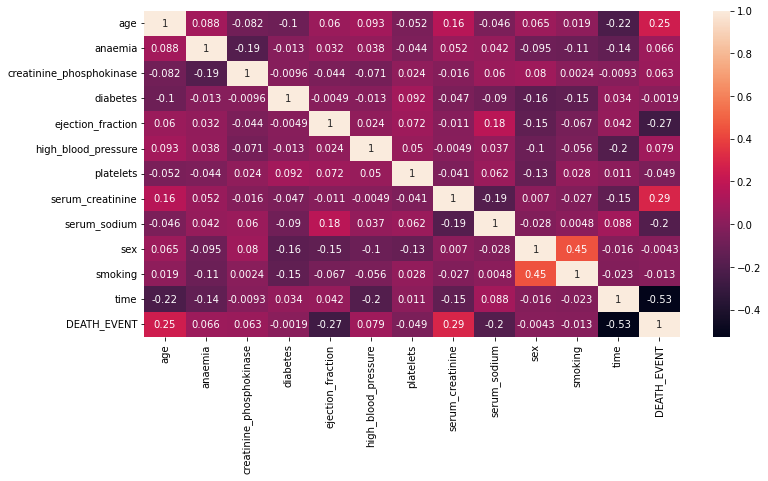

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

**Feature engineering - feature selection:**

Using the technique feature importance to choose the most relevant features.

[0.08999751 0.02353529 0.07787159 0.02986499 0.13035862 0.02344784
 0.07508366 0.12552984 0.09254549 0.02656026 0.02951713 0.27568777]


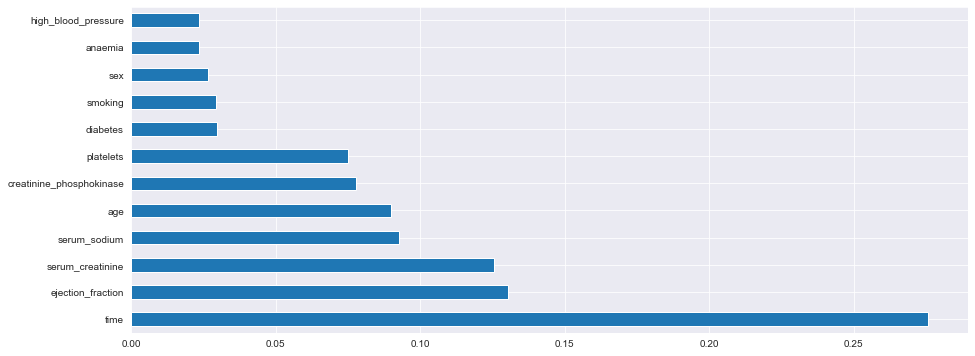

In [79]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = data.iloc[:, :-1]
y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

**Data visualization -**

For improved visualisation, appropriate plots will be created based on the dataset. Seeing the distribution of classes,this will help us to identify which types

Visualizing the number of alive and dead cases -

Total  number of Alive cases:- 203
Total number of Dead cases:- 96


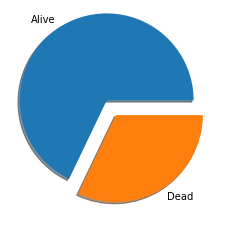

In [25]:
live=data['DEATH_EVENT'][data['DEATH_EVENT'] == 0]
num_live=len(live)
death=data['DEATH_EVENT'][data['DEATH_EVENT'] == 1]
num_death=len(death)
x_axis=np.array([num_live,num_death])
labels=['Alive','Dead']
print(f'Total  number of Alive cases:- {num_live}')
print(f'Total number of Dead cases:- {num_death}')
plt.pie(x_axis, labels = labels, explode=[0.2,0.0], shadow = True)
plt.show()

as we can see there are more number of alive cases than dead cases in the dataset which means the mortality rate as of this dataset is comparitively low.

Now We are going to examine the distribution of Diabetes

/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes', ylabel='Density'>

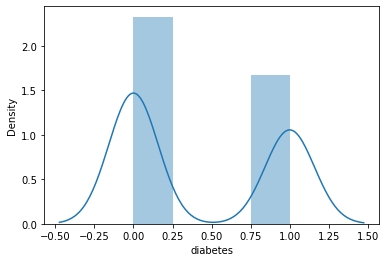

In [26]:
sns.distplot(data['diabetes'])

Visualizing the death event as per diabetes patients -

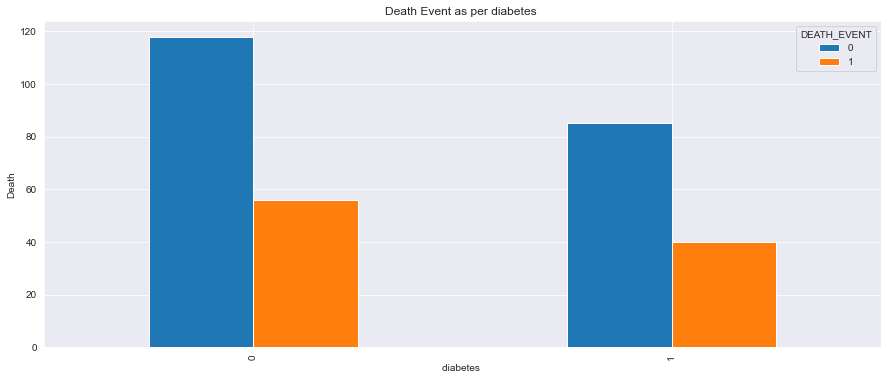

In [87]:
pd.crosstab(data.diabetes ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per diabetes ')
plt.xlabel('diabetes ')
plt.ylabel('Death')
plt.show()

In [83]:
print("Percentage of people who died and have diabetes:", 
      data["DEATH_EVENT"][data["diabetes"] == 1].value_counts(normalize = True)[1]*100)

Percentage of people who died and have diabetes: 32.0


In [85]:
print("Percentage of people who died and do not have diabetes:", 
      data["DEATH_EVENT"][data["diabetes"] == 0].value_counts(normalize = True)[1]*100)

Percentage of people who died and do not have diabetes: 32.18390804597701


As we can observe the number of people that do not have diabetes have a slightly higher mortality rate.

Visualization and Distribution of age -

/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

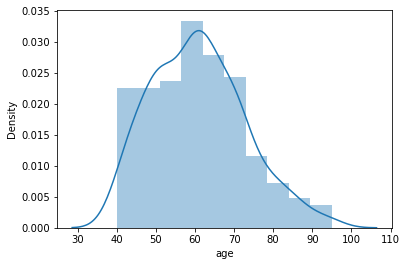

In [31]:
sns.distplot(data['age'])

Visualizing the death event of patients aged above 50 -

Total number of Alive:- 167
Total number of Died:- 85


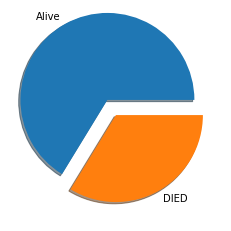

In [32]:
age_above_50_alive = data['DEATH_EVENT'][data.age >=50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]

num_died= len(age_above_50_died)
num_alive= len(age_above_50_alive)

x2_axis= np.array([num_alive, num_died])
labels =['Alive','DIED']

print(f'Total number of Alive:- {num_alive}')
print(f'Total number of Died:- {num_died}')

plt.pie(x2_axis, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

There are more number of alive patients than dead for patients aged above 50. So the mortality rate is not that high for patients aged above 50.

Visualizing the death event as per smoking patients - -

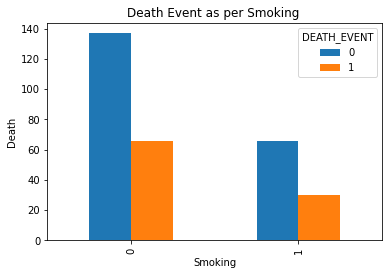

In [33]:
pd.crosstab(data.smoking ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per Smoking ')
plt.xlabel('Smoking')
plt.ylabel('Death')
plt.show()

In [34]:
print("Percentage of people who died and are smokers:", 
      data["DEATH_EVENT"][data["smoking"] == 1].value_counts(normalize = True)[1]*100)

Percentage of people who died and are smokers: 31.25


In [35]:
print("Percentage of people who died and are not smokers:", 
      data["DEATH_EVENT"][data["smoking"] == 0].value_counts(normalize = True)[1]*100)

Percentage of people who died and are not smokers: 32.51231527093596


As we can observe the number of people that do not smoke have a slightly higher mortality rate.

Visualizing the death event as per sex -

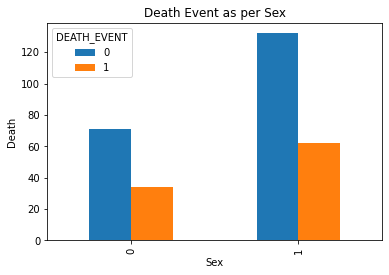

In [36]:
pd.crosstab(data.sex ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per Sex')
plt.xlabel('Sex')
plt.ylabel('Death')
plt.show()

In [37]:
print("Females:", 
      data["DEATH_EVENT"][data["sex"] == 0].value_counts(normalize = True)[1]*100)

print("Males:", 
      data["DEATH_EVENT"][data["sex"] == 1].value_counts(normalize = True)[1]*100)

Females: 32.38095238095238
Males: 31.958762886597935


As we can see there is a very high number of entries for males but if we calculate by percentage we can observe that females have a higher mortality rate

Visualizing the death event as per anaemia patients -

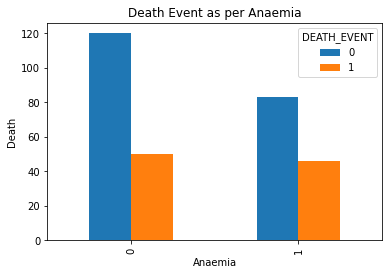

In [38]:
pd.crosstab(data.anaemia  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per Anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

In [88]:
print("Percentage of people who died and have anaemia:", 
      data["DEATH_EVENT"][data["anaemia"] == 1].value_counts(normalize = True)[1]*100)

Percentage of people who died and have anaemia: 35.65891472868217


In [89]:
print("Percentage of people who died and do not have anaemia:", 
      data["DEATH_EVENT"][data["anaemia"] == 0].value_counts(normalize = True)[1]*100)

Percentage of people who died and do not have anaemia: 29.411764705882355


As we see there is a significant difference in the mortality rate between patients who dont have anaemia. The mortality rate for patients with anemia is higher hence making anaemia one of the most important features to cause death among the heart failure patients.

Visualizing the death event as per patients with high blood prerssure -

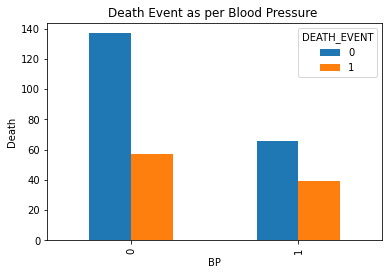

In [41]:
pd.crosstab(data.high_blood_pressure  ,data.DEATH_EVENT).plot(kind='bar')
plt.title('Death Event as per Blood Pressure ')
plt.xlabel('BP')
plt.ylabel('Death')
plt.show()


In [90]:
print("Percentage of people who died and have high blood pressure:", 
      data["DEATH_EVENT"][data["high_blood_pressure"] == 1].value_counts(normalize = True)[1]*100)

Percentage of people who died and have high blood pressure: 37.142857142857146


In [91]:
print("Percentage of people who died and do not have high blood pressure:", 
      data["DEATH_EVENT"][data["high_blood_pressure"] == 0].value_counts(normalize = True)[1]*100)

Percentage of people who died and do not have high blood pressure: 29.381443298969074


As we see there is a significant difference in the mortality rate between patients who dont have high blood pressure. The mortality rate percentage for patients with high blood pressure is significantly higher. Hence, making high blood pressure one of the most important features to cause death among the heart failure patients.

**Modelling the data:**

In [44]:
X = data.drop('DEATH_EVENT',axis=1)
Y = pd.DataFrame(data['DEATH_EVENT'])

In [45]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [46]:
Y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


**Train test splliting:**

The features that are utilised to train the model must be carefully chosen. The dataset will have to be split into training and testing sets for creating the prediction model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=7)

**Feature engineering - scaling features:**

Used to standardize or normalize numerical features to bring them to a similar scale.

In [49]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
scaler = StandardScaler()

data_scaled = data.copy()

I will be training two models,use them to predict and testing their accuracy,

**Machine learning models -**

**Logistic regression**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [52]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [53]:
y_pred=model1.predict(x_test)

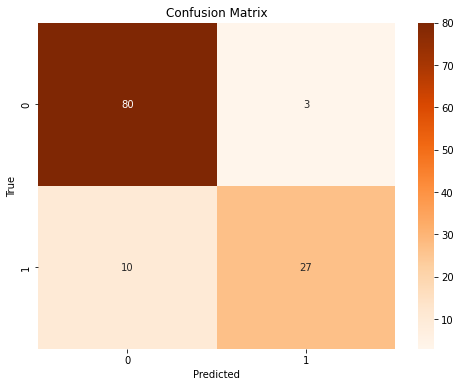

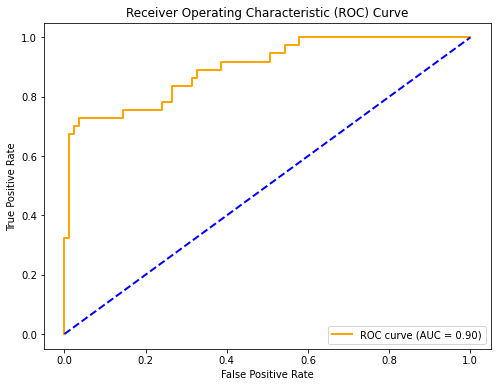

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_proba = model1.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

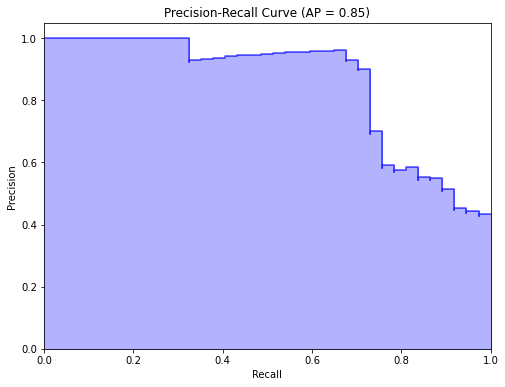

In [55]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()

In [56]:
print("-------------------------------------------------------------------------")
accuracy=accuracy_score(y_test,y_pred)
print("The accuraccy score is: ------>> {:.2f}'".format(accuracy) )
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")


-------------------------------------------------------------------------
The accuraccy score is: ------>> 0.89'
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.89      0.96      0.92        83
           1       0.90      0.73      0.81        37

    accuracy                           0.89       120
   macro avg       0.89      0.85      0.87       120
weighted avg       0.89      0.89      0.89       120



In [57]:
from sklearn.model_selection import cross_val_score

LogisticRegression_cross_val = cross_val_score(LogisticRegression(),X,Y)
print("Cross validation score of Logistic Regression Model:")

count = 0
for i in LogisticRegression_cross_val:
    count+=1
    print(f"{count}) {round(i*100, ndigits = 2)} %")

Cross validation score of Logistic Regression Model:
1) 56.67 %
2) 88.33 %
3) 90.0 %
4) 88.33 %
5) 67.8 %


/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: 

**Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred = model2.predict(x_test)

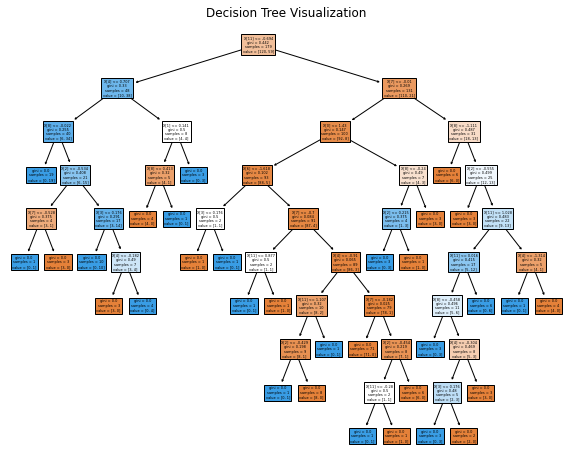

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(model2, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

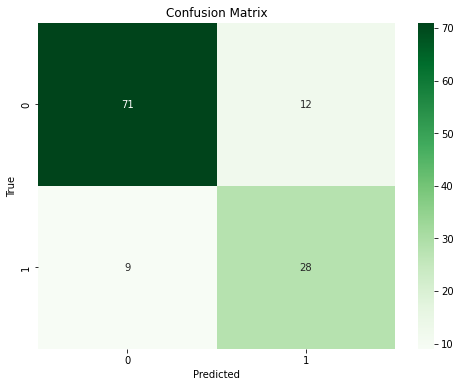

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print("-------------------------------------------------------------------------")
accuracy=accuracy_score(y_test,y_pred)
print("The accuraccy score is: ------>> {:.2f}".format(accuracy) )
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>> 0.82
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.89      0.86      0.87        83
           1       0.70      0.76      0.73        37

    accuracy                           0.82       120
   macro avg       0.79      0.81      0.80       120
weighted avg       0.83      0.82      0.83       120



In [64]:
from sklearn.model_selection import cross_val_score

DecisionTreeClassifier_cross_val = cross_val_score(DecisionTreeClassifier(),X,Y)
print("Cross validation score of DecisionTreeClassifier Model:")

count = 0
for i in DecisionTreeClassifier_cross_val:
    count+=1
    print(f"{count}) {round(i*100, ndigits = 2)} %")

Cross validation score of DecisionTreeClassifier Model:
1) 36.67 %
2) 85.0 %
3) 71.67 %
4) 58.33 %
5) 64.41 %


**Conclusion: -**

 **Evaluation of the model**

In this coursework, I was able to train a model with machine learning, that allows prediction of the mortality rate of heart failure patients based on the presence of patients' behavioral risk factors and features. I started out by cleaning and processing the data, ensuring that there weren't any null values, and removing duplicate entries. Visualizations such as the bar graphs, boxplot, pie charts and heatmaps are done to help understand the dataset better. It results in findings, like how the mortality rate for high blood pressure patients and anaemia is very high compared to patients who smoke and are aged above 50. These processes help prepare the data for training and testing the model. I did training and testing on 2 different models. I Numerically evaluated the performance of the model by doing the classification report, confusion matrix, the Receiver Operating Characteristic curve and Precision-Recall curve.

The first model works better due to better accuracy scores compared to the second model. I believe this would greatly speed up the time spent and reduce the resources used to predict the mortality rate of heart failure patients.It helps doctors and patients get a quick grasp on whether they need detection and immediate treatment. Patients' appointments could also be better scheduled with such a system, putting priority for those patients who would be at a greater risk of death compared to other patients. Even though this model is only done on heart failure, other diseases could also utilize this. Dataset on other behavioral risks can be acquired, and used to predict the mortality rate of other diseases. Since there may be overlapping behavioral risks between diseases, a deeper analysis along with a better algorithm should be used to train the prediction model.

The accuracy of this model can be improved by going into a deeper analysis of the behavioral risks. Further evaluation of how important each individual or set of behavioral risks is to a prediction of mortality rate among heart failure patients will improve the accuracy score. A larger dataset with more detailed findings will also contribute to the accuracy of the prediction models. since I don't have access to a better dataset, there isn't much I can do right now to enhance the model.If the dataset is larger and consists of more details this method can definitely be done with different programming languages, using other ML libraries.
